In [ ]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google

In [ ]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[2]

4

In [ ]:
import matplotlib.pyplot as plt

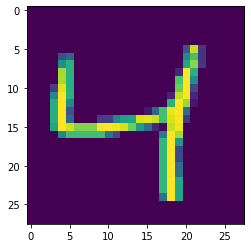

In [ ]:
plt.imshow(x_train[2])

In [ ]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [ ]:
no_of_classes=11
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
y_test[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 200s 106ms/step - loss: 0.2276 - accuracy: 0.9503 - val_loss: 0.0738 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0698 - accuracy: 0.9790 - val_loss: 0.0727 - val_accuracy: 0.9795
Epoch 3/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.1120 - val_accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0964 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.1034 - val_accuracy: 0.9771


In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

In [19]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 172ms/step
[[1.43420154e-09 7.10251153e-24 2.65002100e-11 2.21949759e-12
  6.57486123e-18 3.82603748e-18 3.68943398e-23 1.00000000e+00
  1.15908422e-12 2.59229947e-11 7.54640923e-16]
 [1.09652156e-07 6.95935469e-08 9.99983430e-01 1.61616608e-05
  6.03124999e-14 6.00596599e-16 2.86421056e-07 1.58458699e-19
  1.28612889e-08 2.60003629e-18 8.08688020e-15]
 [1.01879687e-08 9.99846697e-01 6.92960975e-06 2.26254016e-10
  3.25322580e-05 6.49848289e-06 4.40449206e-08 6.45700629e-06
  1.00725803e-04 1.35929124e-09 8.87945772e-10]
 [9.99680161e-01 1.56942688e-12 1.40608947e-09 6.26440089e-12
  9.40631167e-12 4.82473575e-11 1.70342052e-09 7.13887283e-13
  6.13373172e-11 3.19826533e-04 1.84816207e-11]
 [3.41376883e-12 2.70558248e-15 4.97510149e-12 9.25427443e-12
  9.99997854e-01 4.41910387e-15 5.88191431e-16 4.16301955e-15
  2.02482443e-06 1.78546614e-07 6.08614944e-17]]


In [20]:
import numpy as np

In [21]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [22]:
print(y_test[:2])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
model.save('models/mnistcnn.h5')